In [1]:
!pip install matplotlib seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.2.3 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires matplot

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas geopandas folium tqdm geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import re
import plotly.express as px
import folium
from tqdm import tqdm
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import geopandas as gpd


In [6]:
data = pd.read_csv('/kaggle/input/eighteen-nineteen-university-datasets/eighteen_nineteen_university_datasets.csv', encoding='unicode_escape')
data

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [7]:
# Convert to DataFrame

df= pd.DataFrame(data)
df.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2


In [8]:
# Check the null value 
df.isnull().any()

World Rank              False
Institution             False
Location                False
National Rank           False
Quality of Education    False
Alumni Employment       False
Quality of Faculty      False
Research Output         False
Quality Publications    False
Influence               False
Citations               False
Score                   False
dtype: bool

In [9]:
# Sort value just to make sure dataset is sorted

df= df.sort_values(by = "World Rank")
df

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [10]:
# Extract Columns name
df.columns

Index(['World Rank', 'Institution', 'Location', 'National Rank',
       'Quality of Education', 'Alumni Employment', 'Quality of Faculty',
       'Research Output', 'Quality Publications', 'Influence', 'Citations',
       'Score'],
      dtype='object')

In [11]:
# check to see if column is in dataset or not
print("Quality of Education" in df.columns)
print("Quality of Faculty" in df.columns)

False
False


In [12]:
############### Exctracting hidden characters of a column ################

for col in df.columns:
    print(repr(col))

'World Rank'
'Institution'
'Location'
'National Rank'
'Quality\xa0of Education'
'Alumni Employment'
'Quality\xa0of Faculty'
'Research Output'
'Quality Publications'
'Influence'
'Citations'
'Score'


In [13]:
### Change the name of two columns that have special characters ############
df1 = df.rename(columns={"Quality\xa0of Education": "Quality of Education", "Quality\xa0of Faculty" : "Quality of Faculty"} )

In [14]:
df1.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2


In [15]:
df1 = pd.DataFrame(df1)
df1

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [16]:
########### check which column has " - " in it.
for column in df1.columns:
    if "-" in df1[column].values:
        print(f"Column '{column}' contains '-'")
    if "> 1000" in df1[column].values:
        print(f"Column '{column}' contains '>1000'")


Column 'Quality of Education' contains '-'
Column 'Alumni Employment' contains '>1000'
Column 'Quality of Faculty' contains '-'
Column 'Research Output' contains '>1000'
Column 'Quality Publications' contains '>1000'
Column 'Influence' contains '>1000'
Column 'Citations' contains '>1000'


In [17]:
# Check the max value in "Quality of Education" and "Quality of Faculty"

print("Quality of Education has maximum value of %s" %(df1["Quality of Education"].max()))

print("Quality of Faculty has maximum value of %s" %(df1["Quality of Faculty"].max()))


Quality of Education has maximum value of 98
Quality of Faculty has maximum value of 99


In [18]:
# # Check the max value for datset
df1.max(axis=0)

World Rank                           1000
Institution             Örebro University
Location                          Uruguay
National Rank                         213
Quality of Education                   98
Alumni Employment                  > 1000
Quality of Faculty                     99
Research Output                    > 1000
Quality Publications               > 1000
Influence                          > 1000
Citations                          > 1000
Score                               100.0
dtype: object

In [19]:
df1.dtypes 

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education     object
Alumni Employment        object
Quality of Faculty       object
Research Output          object
Quality Publications     object
Influence                object
Citations                object
Score                   float64
dtype: object

In [20]:
df1.columns

Index(['World Rank', 'Institution', 'Location', 'National Rank',
       'Quality of Education', 'Alumni Employment', 'Quality of Faculty',
       'Research Output', 'Quality Publications', 'Influence', 'Citations',
       'Score'],
      dtype='object')

In [21]:
# Replace ">1000" with 1001 
df1 = df1.replace("> 1000", "1001")

In [22]:
#### Convert to -50 to be able to convert column from object to int
df1 = df1.replace("-", "-50 ")

In [23]:
#### Convert object column to int column
cols_to_convert = ['Quality of Education', 'Alumni Employment', 'Quality of Faculty',
       'Research Output', 'Quality Publications', 'Influence', 'Citations']

df1[cols_to_convert] = df1[cols_to_convert].astype(int)

In [24]:
df1.dtypes

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education      int64
Alumni Employment         int64
Quality of Faculty        int64
Research Output           int64
Quality Publications      int64
Influence                 int64
Citations                 int64
Score                   float64
dtype: object

In [25]:
### Here we convert objects to int and tested again compare to above 
print("Quality of Education has maximum value of %s" %(df1["Quality of Education"].max()))
print("Quality of Faculty has maximum value of %s" %(df1["Quality of Faculty"].max()))

Quality of Education has maximum value of 666
Quality of Faculty has maximum value of 303


In [26]:
# replace the -50 with max + 1 in dataset
df1['Quality of Education'].replace(-50, 667, inplace=True)

In [27]:
# replace the -50 with max + 1 in dataset
df1['Quality of Faculty'].replace(-50, 304, inplace=True)

In [28]:
df1['Quality of Education'].max()

667

In [29]:
df1['Quality of Faculty'].max()

304

In [30]:
df1

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,667,1001,304,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,667,1001,304,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,667,1001,304,881,1001,1001,898,69.8


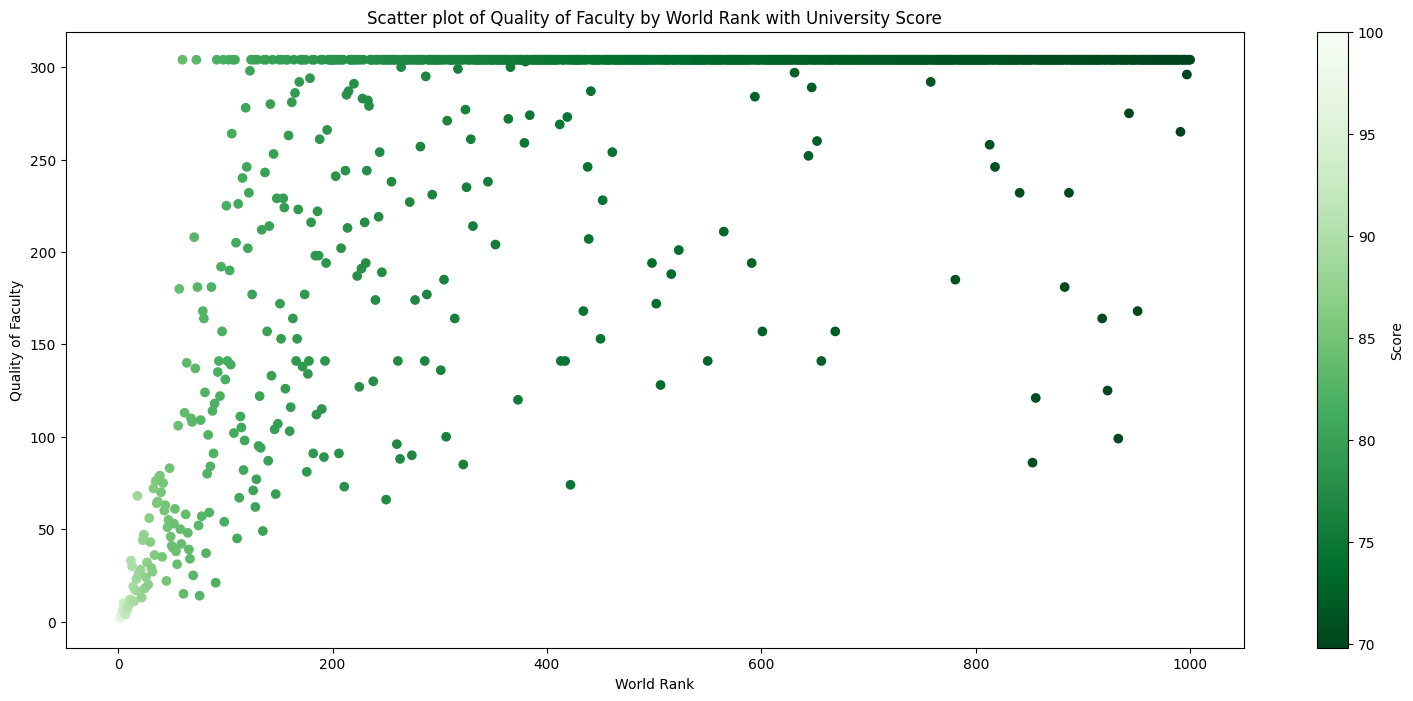

In [31]:
plt.figure(figsize=(19, 8))
scatter = plt.scatter(df1['World Rank'], df1['Quality of Faculty'], c=df1['Score'], cmap='Greens_r')
plt.colorbar(scatter, label='Score')
plt.xlabel('World Rank')
plt.ylabel('Quality of Faculty')
plt.title('Scatter plot of Quality of Faculty by World Rank with University Score')
plt.show()

In [32]:
df2 = df1[df1["Location"] == "USA"]
df2

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
5,6,"University of California, Berkeley",USA,4,7,52,5,18,12,4,8,92.5
6,7,Princeton University,USA,5,4,15,4,146,99,28,27,91.9
...,...,...,...,...,...,...,...,...,...,...,...,...
976,977,Missouri University of Science and Technology,USA,209,667,392,304,916,827,1001,1001,69.9
979,980,Eastern Virginia Medical School,USA,210,667,1001,304,1001,1001,792,327,69.9
980,981,University of North Carolina at Greensboro,USA,211,667,1001,304,1001,938,1001,673,69.9
992,993,University of Massachusetts Lowell,USA,212,667,930,304,1001,989,1001,541,69.8


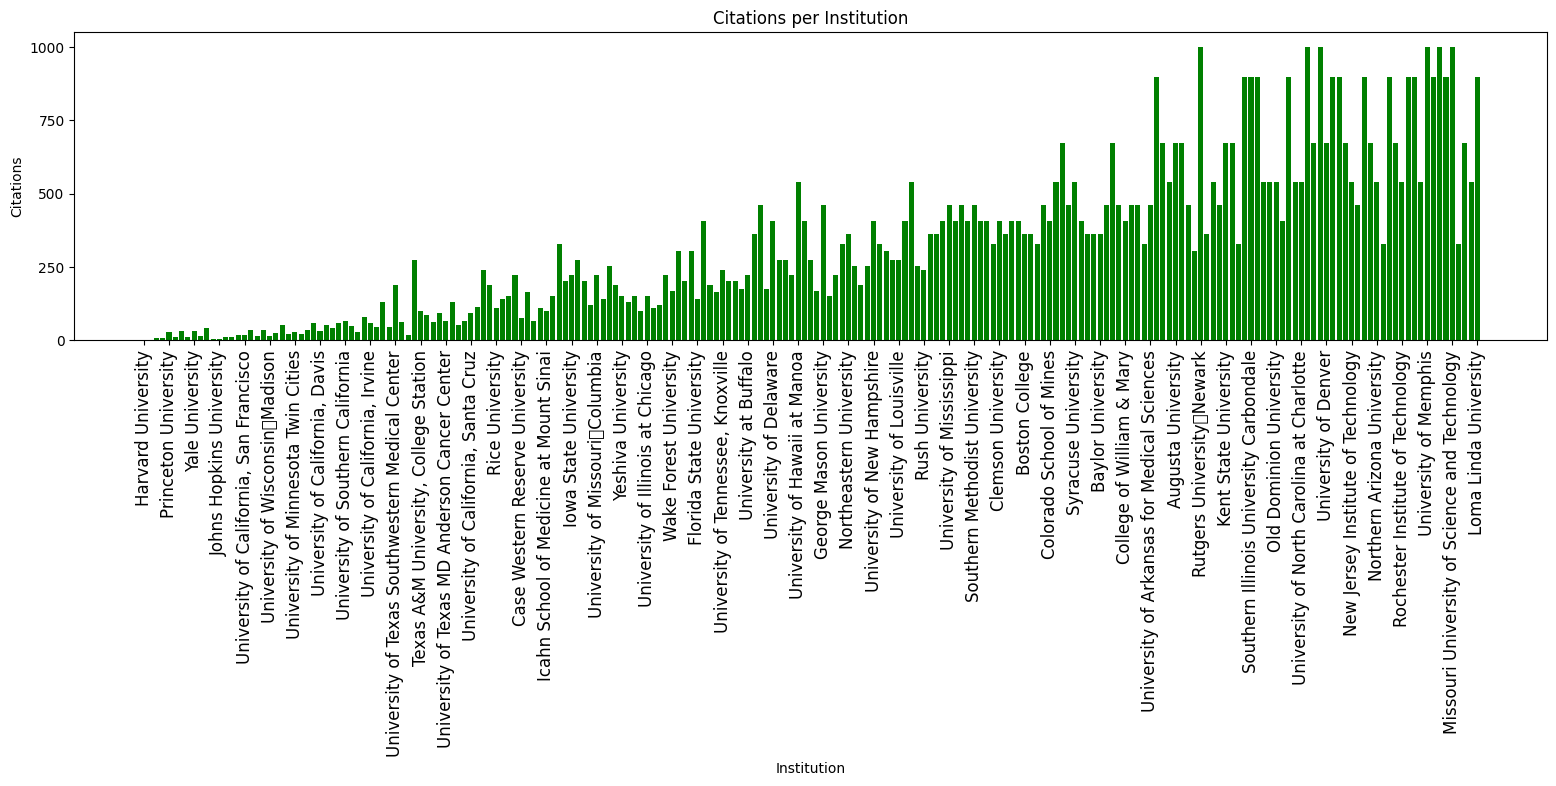

In [33]:
plt.figure(figsize=(19, 4))
bar = plt.bar(df2['Institution'], df2['Citations'], color = "green")
plt.xlabel('Institution')
plt.ylabel('Citations')
plt.title('Citations per Institution')
labels = df2['Institution'].tolist()[::4]  
plt.xticks(labels, rotation=90, fontsize=12)
plt.yticks([0, 250, 500, 750, 1000])
plt.show()

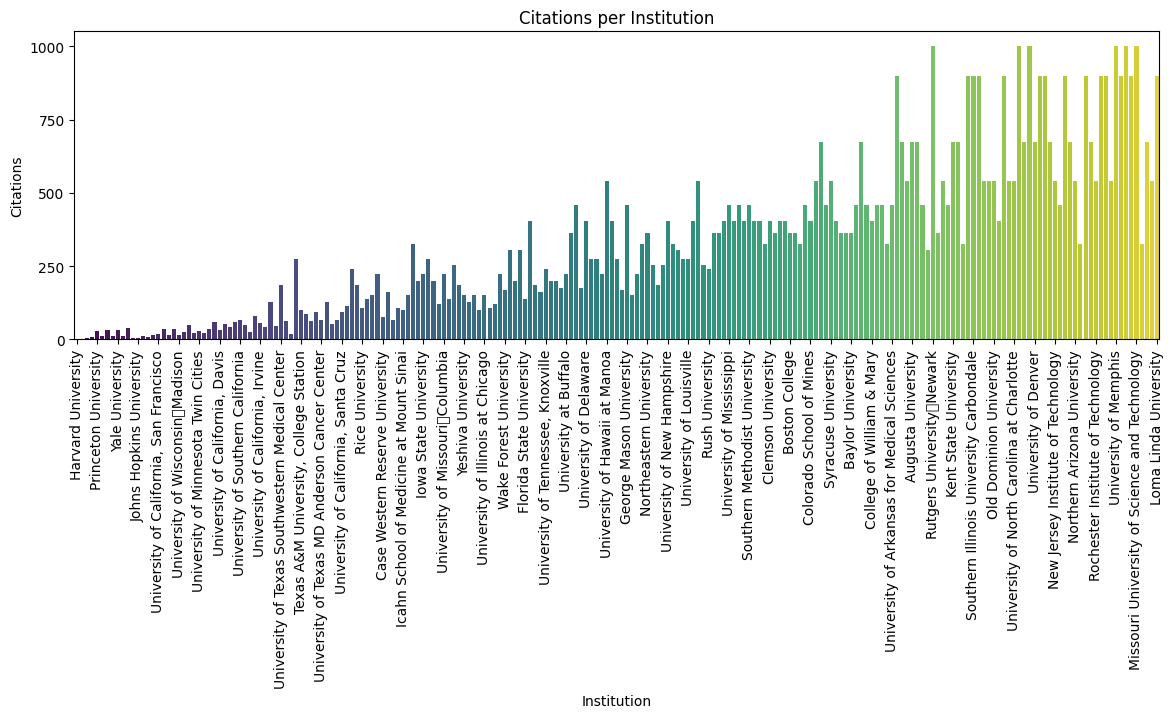

In [34]:
plt.figure(figsize=(14, 4))
sns.barplot(data=df2, x="Institution", y="Citations", palette="viridis")

plt.xlabel('Institution')
plt.ylabel('Citations')
plt.title('Citations per Institution')

ticks = range(0, len(df2['Institution']), 4)  # Adjust 4 to control the spacing of ticks
labels = df2['Institution'].tolist()[::4]  # Get every 4th institution name

plt.xticks(ticks, labels, rotation=90)
plt.yticks([0, 250, 500, 750, 1000])
plt.show()

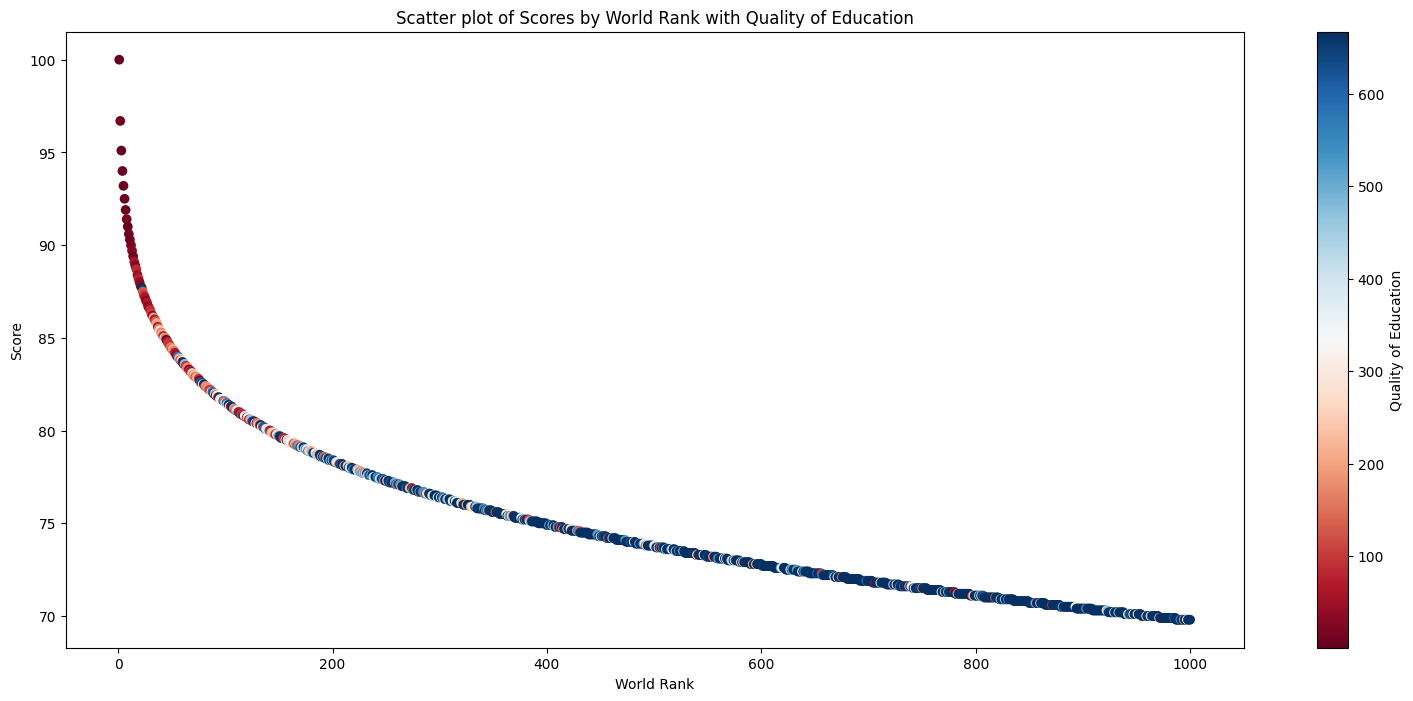

In [35]:
plt.figure(figsize=(19, 8))
scatter = plt.scatter(df1['World Rank'], df1['Score'], c=df1['Quality of Education'], cmap='RdBu')
plt.colorbar(scatter, label='Quality of Education')
plt.xlabel('World Rank')
plt.ylabel('Score')
plt.title('Scatter plot of Scores by World Rank with Quality of Education')
plt.show()

In [36]:
### Filter top 100 universities based on their score
df2 = df1.iloc[0:100, : ]
df2      

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,University of Alberta,Canada,4,281,371,192,62,69,117,80,81.7
96,97,Grenoble Alpes University,France,4,334,1001,157,89,87,75,93,81.7
97,98,Tsinghua University,China,2,586,109,304,22,41,96,108,81.6
98,99,University of Basel,Switzerland,4,142,393,54,218,162,89,139,81.6


In [37]:
# Count number of USA universities in top 100
count_a = (df2['Location'] == 'USA').sum()
count_a

51

In [38]:
df2['Count'] = df2.groupby('Institution')['Institution'].transform('count')
df2

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score,Count
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0,1
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7,1
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1,1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0,1
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,University of Alberta,Canada,4,281,371,192,62,69,117,80,81.7,1
96,97,Grenoble Alpes University,France,4,334,1001,157,89,87,75,93,81.7,1
97,98,Tsinghua University,China,2,586,109,304,22,41,96,108,81.6,1
98,99,University of Basel,Switzerland,4,142,393,54,218,162,89,139,81.6,1


In [39]:
# Display total number of university in each location within first 100.
df2['Count'] = df2.groupby('Institution')['Institution'].transform('count')

fig = px.sunburst(df2, path=['Location', 'Score' , 'Institution'], values='Count', 
                  color='Score', hover_data=['Institution'], color_continuous_scale='orrd')

# Adjusting the layout to make the plot bigger
fig.update_layout(title='World University Rankings (Top 100)', width=800, height=800)
fig.show()

In [40]:
df3 = pd.DataFrame(df2.iloc[ : , 2])

In [41]:
df4 = pd.DataFrame(df2.iloc[ : , 1])

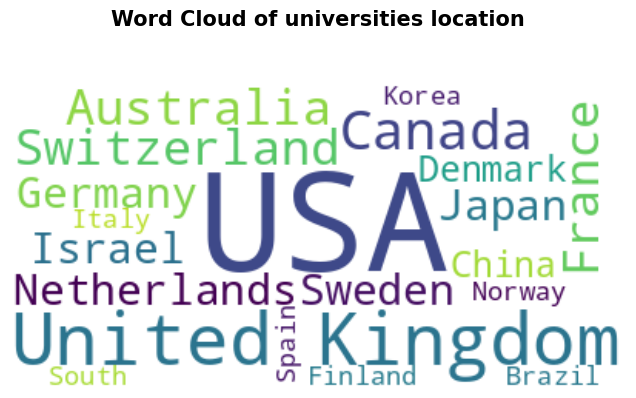

In [42]:
# Set the figure size
plt.figure(figsize=(9, 4)) 
# Concatenate all text data into a single string
text = " ".join(df3['Location'])

# Generate the word cloud
wordcloud = WordCloud(max_font_size=90, max_words=100, background_color="white").generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title ("Word Cloud of universities location", size= 15, fontweight='bold',  y= 1.15)
plt.show()

In [43]:

# Create basic choropleth map
fig = px.choropleth(df1,
                    locations='Location',
                    locationmode='country names',  
                    color='Score',
                    hover_name='Institution',
                    animation_frame='Score',
                    projection='natural earth')

# Update layout to make the map larger, color bar smaller, and reduce distance of animation frame
fig.update_layout(
    title={
        'text': 'World University Rankings (Top 100)',
        'x': 0.5,  # Center the title horizontally
        'y': 0.80,  # Place the title closer to the top of the figure
        'xanchor': 'center',  # Anchor the title's horizontal center to the x position
        'yanchor': 'top'  # Anchor the title's top to the y position
    },
    width=1000,  # Width of the figure
    height=1000,  # Height of the figure
    #margin=dict(t=80, b=10, l=50, r=50),  # Adjust the margins to reduce whitespace
    coloraxis_colorbar=dict(
        lenmode='fraction',  # Use a fraction of the plot height
        len=0.5,  # Set the color bar length as a fraction of the plot height
        thicknessmode='fraction',  # Use a fraction of the plot width
        thickness=0.03  # Set the color bar thickness as a fraction of the plot width
    ),
    sliders=[{
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {'font': {'size': 20}, 'prefix': 'Score: ', 'visible': True, 'xanchor': 'right'},
        'pad': {'b': 10, 't': 20},  # Adjust padding to move slider closer to the plot
        'len': 0.9,  # Length of the slider
        'x': 0,  # x position of the slider
        'y': 0.2,  # y position of the slider
    }]
)

fig.show()


In [44]:
# Add columns for latitude and longitude
df['location_lat'] = None
df['location_lon'] = None

# Initialize geolocator
geolocator = Nominatim(user_agent="university_locator")

# Function to geocode a location
def geocode_location(row):
    try:
        loc = f"{row['Location']},{row['Institution']}"
        address = geolocator.geocode(loc)
        return address.latitude, address.longitude
    except:
        try:
            address = geolocator.geocode(row['Location'])
            return address.latitude, address.longitude
        except:
            return None, None

# Apply geocoding with progress bar
tqdm.pandas()
df[['location_lat', 'location_lon']] = df.progress_apply(geocode_location, axis=1, result_type='expand')

# Drop rows with missing coordinates
df = df.dropna(subset=['location_lat', 'location_lon'])

# Convert DataFrame to GeoDataFrame
df['geometry'] = df.apply(lambda row: Point(row['location_lon'], row['location_lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Set CRS (Coordinate Reference System) to WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Initialize a map
university_map = folium.Map(location=[20, 0], zoom_start=2)

# Add university locations to the map
for _, row in gdf.iterrows():
    folium.Marker(
        location=[row['location_lat'], row['location_lon']],
        popup=f"{row['Institution']}<br>World Rank: {row['World Rank']}<br>National Rank: {row['National Rank']}",
        tooltip=row['Institution']
    ).add_to(university_map)

# Display the map
university_map

100%|██████████| 1000/1000 [10:08<00:00,  1.64it/s]
